In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import datetime

df_stikhi = pd.read_csv('./101120_stikhicats.csv', index_col = 0)
df_manifest = pd.read_csv('./083020_manifestcats.csv', index_col = 0)
df_dnevnik = pd.read_csv('./072420_dnevnikcats.csv', index_col = 0)
df_roman = pd.read_csv('./101820_romancats.csv', index_col = 0)
df_gazet = pd.read_csv('./102920_gazetcats.csv', index_col = 0)

In [2]:
passw = '****'
engine = sqlalchemy.create_engine('mysql+pymysql://madkehl:' + passw + '@127.0.0.1/prozhito_orig', encoding = 'utf-8')
connection = engine.connect()
metadata = sqlalchemy.MetaData()
notes = sqlalchemy.Table('notes', metadata, autoload = True, autoload_with = engine)
persons = sqlalchemy.Table('persons', metadata, autoload = True, autoload_with = engine)
diary =sqlalchemy.Table('diary', metadata, autoload = True, autoload_with = engine)

def execute(query):
    ResultProxy = connection.execute(query)
    return ResultProxy

def countyear(list_years):
    '''
    SELECT COUNT(YEAR(date)) AS NEWYEAR from notes WHERE YEAR(date) in (1901, 1903, 1906) GROUP BY YEAR(date); 
    **for some reason the year column is less complete than date column
    '''
    
    input_ls = [str(i) for i in list(list_years)]
    input_str = ', '.join(input_ls)
    
    trial = execute('SELECT YEAR(date), COUNT(YEAR(date))FROM notes WHERE YEAR(date) in ('+ (input_str) + ') GROUP BY YEAR(date);')
    ResultSet = trial.fetchall()
    return ResultSet
    

C:\Users\madke\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


In [17]:
def reindex(cats_ls, entry_type, entry_ids, entry_year, diarynum):
    new_ind = []
    new_ids = []
    new_entyr = []
    new_diarnum = []
    for n, m in enumerate(entry_type):
        for i, j  in enumerate(cats_ls):
            if m in j:
                new_ind.append(i)
                new_ids.append(entry_ids.iloc[n])
                new_entyr.append(entry_year.iloc[n])
                new_diarnum.append(diarynum.iloc[n])
                
    return(new_ind, new_ids, new_entyr, new_diarnum)
            

def create_new_df(cats_ls, df, new_names):
    
    
    code = dict(zip(range(len(new_names)), new_names))
    new_type, new_ids, new_entyr, new_diarnum = reindex(cats_ls, df['entry_type'], df['entry_id'], df['entry_year'], df['diarynum'])
    
    new_df = pd.DataFrame({
        
        'diarynum': new_diarnum,
        'entry_id': new_ids,
        'entry_year': new_entyr,
        'new_entry_type': new_type,
        'new_name_type':[code[num] for num in new_type]
        
    })
    return(new_df)

In [3]:
years = range(1899, 2019)
year_count = countyear(years)

years_df = pd.DataFrame({
    'entry_year': [i[0] for i in year_count],
    'year_totals': [i[1] for i in year_count]
})

In [4]:
years_df.to_csv('./year_totals.csv')

**excluded
dnev_notes = 1, 16, 30, 31, 3, 33
gaz_ titles numbers petersburgskaia gazeta

In [3]:
dnev_rout = [10,11,12,13, 14,15, 34, 8]
dnev_interp = [18,28,2,20]
dnev_lit = [19,22,32,7,9, 17]
dnev_spir = [5, 35, 29, 23, 26, 21]
dnev_form = [27, 4, 24, 25, 6]
dnev_cats = [dnev_rout, dnev_interp, dnev_form, dnev_lit, dnev_spir]
dnev_names = ['Routine','Form', 'Interpersonal', 'Literary', 'Spirit']

stix_read = [0]
stix_test = [1]
stix_form = [2]
stix_sovrev = [3]
stix_cit = [4]
stix_judg = [5,6]
stix_cont = [7]
stix_exp = [8]
stix_interp = [9,10]
stix_pro = [11]
stix_rec = [12]
stix_cats = [stix_read, stix_form,  stix_interp, stix_cont,stix_cit, stix_pro, 
             stix_sovrev, stix_rec,  stix_test, stix_judg,stix_exp]
stix_names = ['Reading','Form', 'Interpersonal', 'Content', 'Citations', 'Professional Activity', 
              'Soviet Revolution','Recitation', 'Testimony', 'Judgement', 'Expression']


gaz_op = [0]
gaz_rout = [4]
gaz_persmen = [5] 
gaz_cult = [6]
gaz_proact = [7]
gaz_info = [8]
gaz_form = [9]
gaz_pol = [10]
gaz_war = [11]
gaz_cats = [ gaz_rout, gaz_form, gaz_persmen, gaz_proact,
            gaz_pol, gaz_war, gaz_info, gaz_cult, gaz_op]
gaz_names = ['Routine', 'Form', 'Personal Mentions', 'Professional Activity',
            'Politics', 'War', 'Information', 'Culture', 'Opinions']

rom_cont = [0]
rom_histfict = [1]
rom_interp = [2]
rom_media= [3]
rom_judg = [4]
rom_pro = [5]
rom_pub = [6]
rom_sovnov = [7]   
rom_litmod = [8]
rom_form = [9]
rom_cats = [rom_form, rom_cont, rom_interp, rom_media, rom_pro, 
            rom_pub, rom_sovnov, rom_histfict, rom_litmod, rom_judg]
rom_names = ['Form', 'Content', 'Interpersonal', 'In Media', 'Professional Activity',
            'Publication', 'Soviet Novel', 'Historical Fiction', 'Literary Models', 'Judgement']

man_textobj = [0]
man_interp = [1]
man_form = [2]
man_remin = [3]
man_hist = [4] 
man_inst = [5]
man_revhist = [6] 
man_mon = [7,8]

man_cats = [man_form, man_interp, man_hist, man_revhist, man_mon, man_textobj, man_remin]

man_names = ['Form', 'Interpersonal', 'History', 'Revolutionary History', 'Monarchy',
            'Textual Object', 'Reminiscence']

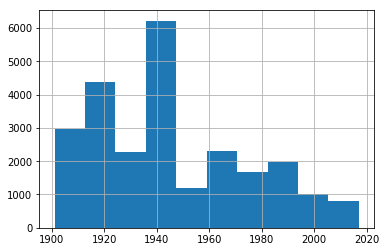

In [30]:
#new_dnev = create_new_df(dnev_cats, df_dnevnik, dnev_names)
%matplotlib inline
new_gaz['entry_year'].hist()

In [21]:
new_dnev.to_csv('./110920_dnevnik.csv')

In [23]:
new_stix = create_new_df(stix_cats, df_stikhi, stix_names)

new_stix.to_csv('./110920_poetry.csv')

In [24]:
new_rom = create_new_df(rom_cats, df_roman, rom_names)

new_rom.to_csv('./110920_roman.csv')

In [25]:
new_gaz = create_new_df(gaz_cats, df_gazet, gaz_names)

new_gaz.to_csv('./110920_news.csv')

In [26]:
new_man = create_new_df(man_cats, df_manifest, man_names)

new_man.to_csv('./110920_man.csv')

In [13]:
new_rom

,diarynum,entry_id,entry_year,new_entry_type,new_name_type
0,3.0,895,1935.0,8,Literary Models
1,3.0,721,1933.0,1,Content
2,3.0,865,1935.0,4,Professional Activity
3,3.0,908,1936.0,9,Judgement
4,3.0,865,1935.0,4,Professional Activity
...,...,...,...,...,...
7137,3.0,865,1935.0,5,Publication
7138,3.0,867,1935.0,6,Soviet Novel
7139,2.0,1476,1918.0,0,Form
7140,3.0,733,1934.0,3,In Media
